In [ ]:
#CNN MODELİ

from google.colab import drive
drive.mount('/content/drive')
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D

from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 13:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = LearningRateScheduler(scheduler)
#Veri seti
veriseti = "/content/drive/MyDrive/projederin/BDMediLeaves Dataset Original - TrainValTest1"

class_names= os.listdir(veriseti)

# data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

#veri setini yükle
train_data = train_datagen.flow_from_directory(
    os.path.join(veriseti, 'Train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_data = validation_datagen.flow_from_directory(
    os.path.join(veriseti, 'Validation'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

#model eğitimi
def training(model, train_generator, validation_generator):
    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

    # Modeli eğit
    history = model.fit(
        train_generator,
        epochs=12,
        validation_data=validation_generator,
        callbacks=[early_stopping, lr_scheduler]
    )
    return history




def cnn_model(input_shape, num_classes):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(2, 2))

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

Mounted at /content/drive
Found 1440 images belonging to 10 classes.
Found 406 images belonging to 10 classes.


In [ ]:
cnn = cnn_model((224, 224, 3), 10)
cnn_history = training(cnn, train_data, validation_data)

Epoch 1/12
45/45 [==============================] - 1704s 38s/step - loss: 2.3711 - accuracy: 0.1750 - val_loss: 2.0375 - val_accuracy: 0.3251 - lr: 0.0010
Epoch 2/12
45/45 [==============================] - 141s 3s/step - loss: 1.8532 - accuracy: 0.3396 - val_loss: 1.7075 - val_accuracy: 0.3916 - lr: 0.0010
Epoch 3/12
45/45 [==============================] - 144s 3s/step - loss: 1.5079 - accuracy: 0.4882 - val_loss: 2.3395 - val_accuracy: 0.3424 - lr: 0.0010
Epoch 4/12
45/45 [==============================] - 150s 3s/step - loss: 1.2271 - accuracy: 0.5847 - val_loss: 1.0828 - val_accuracy: 0.6379 - lr: 0.0010
Epoch 5/12
45/45 [==============================] - 150s 3s/step - loss: 1.0427 - accuracy: 0.6542 - val_loss: 1.0995 - val_accuracy: 0.6404 - lr: 0.0010
Epoch 6/12
45/45 [==============================] - 145s 3s/step - loss: 0.8632 - accuracy: 0.6896 - val_loss: 0.9568 - val_accuracy: 0.6749 - lr: 0.0010
Epoch 7/12
45/45 [==============================] - 146s 3s/step - loss: 0

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    os.path.join(veriseti, 'Test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = cnn.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy}")

Found 202 images belonging to 10 classes.
7/7 [==============================] - 171s 28s/step - loss: 0.9773 - accuracy: 0.7624
Test Accuracy: 0.7623762488365173


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report


y_pred = cnn.predict(test_data)
y_true = test_data.classes



cnn_class_report = classification_report(y_true, y_pred.argmax(axis=1))

# Raporu ekrana yazdırma
print(cnn_class_report)

7/7 [==============================] - 14s 2s/step
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        20
           1       0.94      0.81      0.87        21
           2       0.88      0.75      0.81        20
           3       0.71      0.81      0.76        21
           4       0.68      0.85      0.76        20
           5       0.80      0.70      0.74        23
           6       0.89      0.76      0.82        21
           7       0.50      0.13      0.21        15
           8       0.69      1.00      0.82        20
           9       0.64      0.86      0.73        21

    accuracy                           0.76       202
   macro avg       0.76      0.75      0.73       202
weighted avg       0.77      0.76      0.75       202



7/7 [==============================] - 15s 2s/step


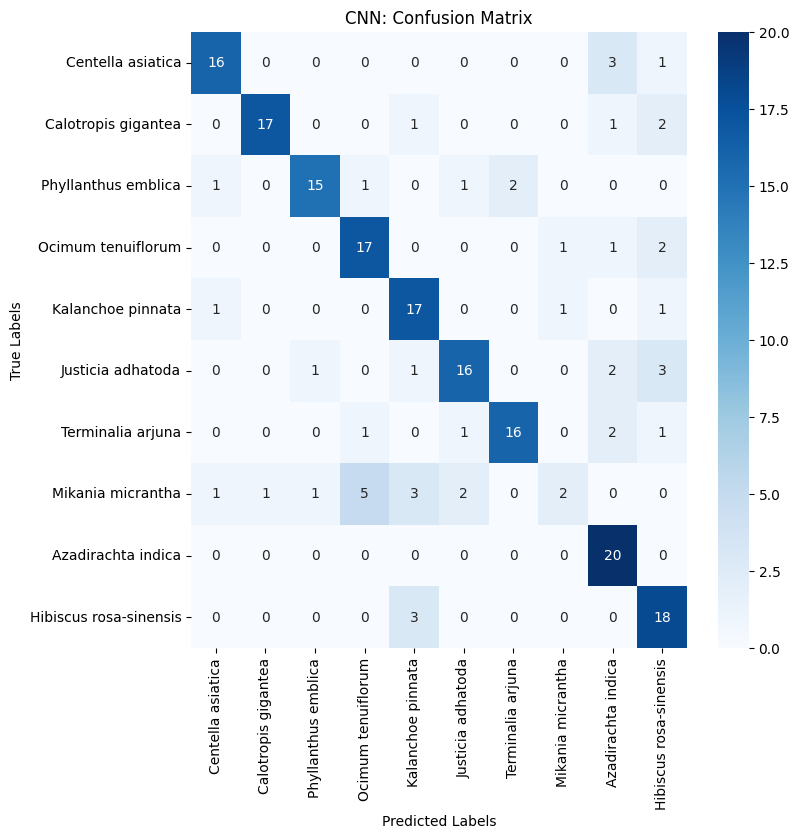

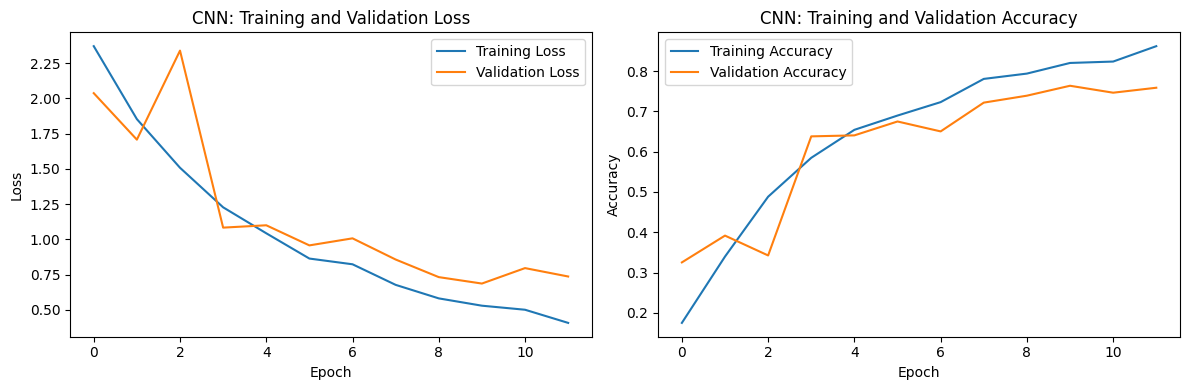

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

class_names =  ['Centella asiatica', 'Calotropis gigantea', 'Phyllanthus emblica', 'Ocimum tenuiflorum', 'Kalanchoe pinnata', 'Justicia adhatoda', 'Terminalia arjuna', 'Mikania micrantha', 'Azadirachta indica', 'Hibiscus rosa-sinensis']
# Test veri seti üzerinde tahminler yapma
predictions = cnn.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_data.classes


# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Confusion matrix'in ısı haritasını çizme
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('CNN: Confusion Matrix')
plt.show()

# train loss- accuracy validation loss- aaccuracy
plt.figure(figsize=(12, 4))

# Eğitim ve doğrulama loss
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Eğitim ve doğrulama accuracy
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#VGG19

from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.optimizers import Adam
from keras.applications import VGG19

def create_vgg19_model(input_shape, num_classes):
    vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
    for layer in vgg19_model.layers:
        layer.trainable = False
    model = Sequential()
    model.add(vgg19_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

vgg_train_generator = train_datagen.flow_from_directory(
    os.path.join(veriseti, 'Train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

vgg_validation_generator = validation_datagen.flow_from_directory(
    os.path.join(veriseti, 'Validation'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

vgg_test_generator = test_datagen.flow_from_directory(
    os.path.join(veriseti, 'Test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


vgg19_model = create_vgg19_model((224, 224, 3), 10)
vgg19_history = training(vgg19_model, vgg_train_generator, vgg_validation_generator)


Found 1440 images belonging to 10 classes.
Found 406 images belonging to 10 classes.
Found 202 images belonging to 10 classes.
Epoch 1/4
45/45 [==============================] - 164s 4s/step - loss: 2.0760 - accuracy: 0.2701 - val_loss: 1.5922 - val_accuracy: 0.5739 - lr: 0.0010
Epoch 2/4
45/45 [==============================] - 152s 3s/step - loss: 1.4582 - accuracy: 0.5625 - val_loss: 1.1701 - val_accuracy: 0.7340 - lr: 0.0010
Epoch 3/4
45/45 [==============================] - 150s 3s/step - loss: 1.1502 - accuracy: 0.6500 - val_loss: 0.9593 - val_accuracy: 0.7192 - lr: 0.0010
Epoch 4/4
45/45 [==============================] - 144s 3s/step - loss: 0.9965 - accuracy: 0.7007 - val_loss: 0.8255 - val_accuracy: 0.7611 - lr: 0.0010


In [ ]:
test_loss, test_accuracy = vgg19_model.evaluate(vgg_test_generator)
print(f"Test Accuracy: {test_accuracy}")

7/7 [==============================] - 17s 3s/step - loss: 0.8371 - accuracy: 0.7673
Test Accuracy: 0.7673267126083374


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report


y_pred = vgg19_model.predict(vgg_test_generator)
y_true = vgg_test_generator.classes

vgg19_class_report = classification_report(y_true, y_pred.argmax(axis=1))


print(vgg19_class_report)

7/7 [==============================] - 16s 2s/step
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        20
           1       0.95      0.95      0.95        21
           2       0.60      0.90      0.72        20
           3       0.70      0.33      0.45        21
           4       0.73      0.95      0.83        20
           5       0.83      0.83      0.83        23
           6       0.50      0.62      0.55        21
           7       0.75      0.20      0.32        15
           8       0.95      0.95      0.95        20
           9       0.90      0.86      0.88        21

    accuracy                           0.77       202
   macro avg       0.78      0.75      0.74       202
weighted avg       0.78      0.77      0.75       202



7/7 [==============================] - 14s 2s/step


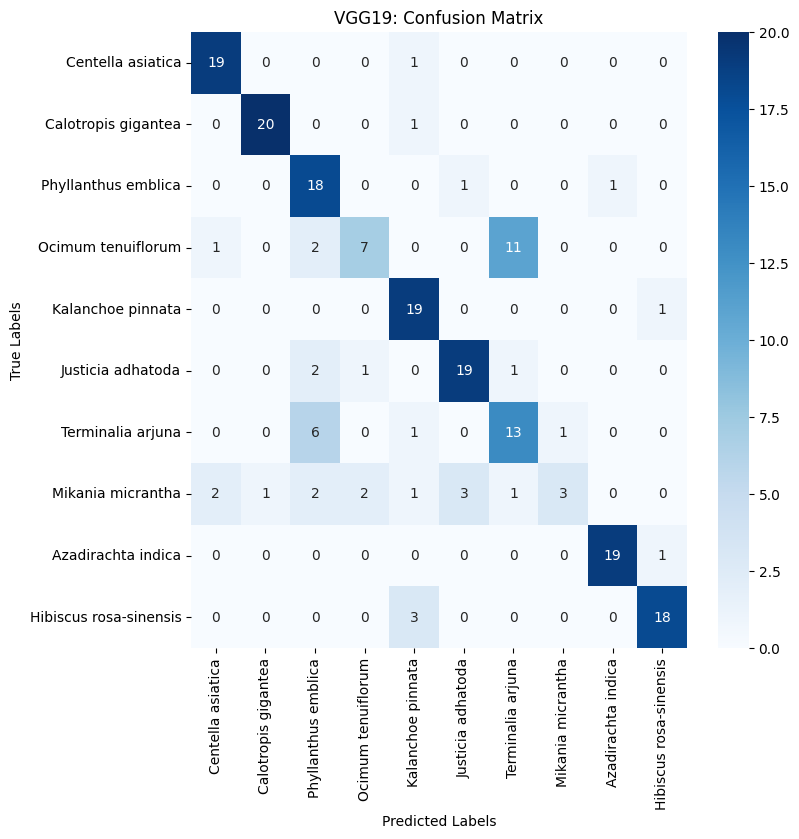

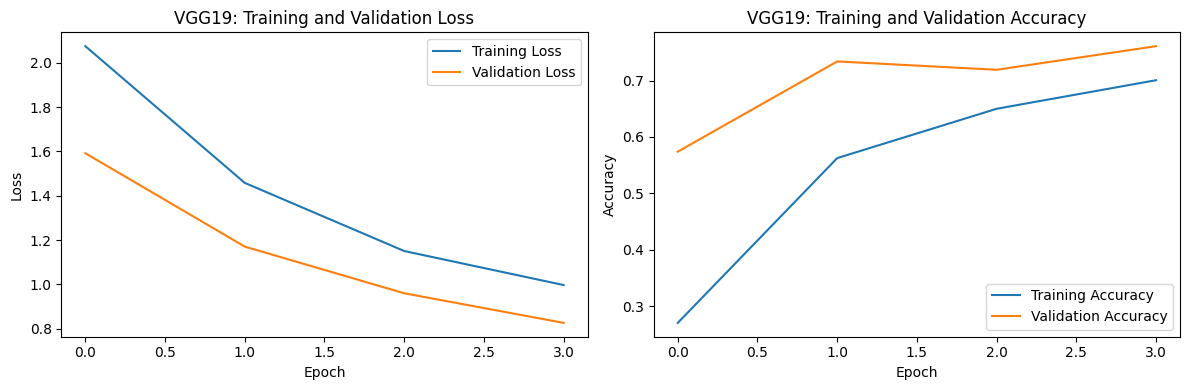

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

class_names =  ['Centella asiatica', 'Calotropis gigantea', 'Phyllanthus emblica', 'Ocimum tenuiflorum', 'Kalanchoe pinnata', 'Justicia adhatoda', 'Terminalia arjuna', 'Mikania micrantha', 'Azadirachta indica', 'Hibiscus rosa-sinensis']
# Test veri seti üzerinde tahminler yapma
predictions = vgg19_model.predict(vgg_test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = vgg_test_generator.classes


# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Confusion matrix'in ısı haritasını çizme
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('VGG19: Confusion Matrix')
plt.show()

# train loss- accuracy validation loss- aaccuracy
plt.figure(figsize=(12, 4))

# Eğitim ve doğrulama loss
plt.subplot(1, 2, 1)
plt.plot(vgg19_history.history['loss'], label='Training Loss')
plt.plot(vgg19_history.history['val_loss'], label='Validation Loss')
plt.title('VGG19: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Eğitim ve doğrulama accuracy
plt.subplot(1, 2, 2)
plt.plot(vgg19_history.history['accuracy'], label='Training Accuracy')
plt.plot(vgg19_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG19: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import os
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D


from keras.applications import DenseNet121

def create_densenet_model(input_shape, num_classes):
    dense_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)


    for layer in dense_model.layers:
        layer.trainable = False


    model = Sequential()
    model.add(dense_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

dense_train_generator = train_datagen.flow_from_directory(
    os.path.join(veriseti, 'Train'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

dense_validation_generator = validation_datagen.flow_from_directory(
    os.path.join(veriseti, 'Validation'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

dense_test_generator = test_datagen.flow_from_directory(
    os.path.join(veriseti, 'Test'),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


def training(model, train_generator, validation_generator):

    early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)


    history = model.fit(
        train_generator,
        epochs=6,
        validation_data=validation_generator,
        callbacks=[early_stopping, lr_scheduler]
    )
    return history


dense_model = create_densenet_model((224, 224, 3), 10)
dense_history = training(dense_model, dense_train_generator, dense_validation_generator)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1440 images belonging to 10 classes.
Found 406 images belonging to 10 classes.
Found 202 images belonging to 10 classes.
29084464/29084464 [==============================] - 3s 0us/step
Epoch 1/6
45/45 [==============================] - 148s 3s/step - loss: 1.2440 - accuracy: 0.5889 - val_loss: 0.3885 - val_accuracy: 0.8966 - lr: 0.0010
Epoch 2/6
45/45 [==============================] - 147s 3s/step - loss: 0.5059 - accuracy: 0.8410 - val_loss: 0.3707 - val_accuracy: 0.8498 - lr: 0.0010
Epoch 3/6
45/45 [==============================] - 147s 3s/step - loss: 0.3288 - accuracy: 0.9007 - val_loss: 0.2079 - val_accuracy: 0.9483 - lr: 0.0010
Epoch 4/6
45/45 [==============================] - 142s 3s/step - loss: 0.2685 - accuracy: 0.9049 - val_loss: 0.1982 - val_accuracy: 0.9310 - lr: 0.0010
Epoch 5/6
45/45 [==============================] - 140s 3s/step - l

In [ ]:
test_loss, test_accuracy = dense_model.evaluate(dense_test_generator)
print(f"Test Accuracy: {test_accuracy}")

7/7 [==============================] - 18s 3s/step - loss: 0.1611 - accuracy: 0.9307
Test Accuracy: 0.9306930899620056


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report


y_pred = dense_model.predict(dense_test_generator)
y_true = dense_test_generator.classes

dense_class_report = classification_report(y_true, y_pred.argmax(axis=1))


print(dense_class_report)

7/7 [==============================] - 15s 2s/step
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       0.95      1.00      0.98        21
           2       0.95      0.90      0.92        20
           3       0.77      0.95      0.85        21
           4       1.00      1.00      1.00        20
           5       1.00      0.91      0.95        23
           6       0.86      0.86      0.86        21
           7       0.90      0.60      0.72        15
           8       1.00      1.00      1.00        20
           9       1.00      1.00      1.00        21

    accuracy                           0.93       202
   macro avg       0.93      0.92      0.92       202
weighted avg       0.93      0.93      0.93       202



7/7 [==============================] - 15s 2s/step


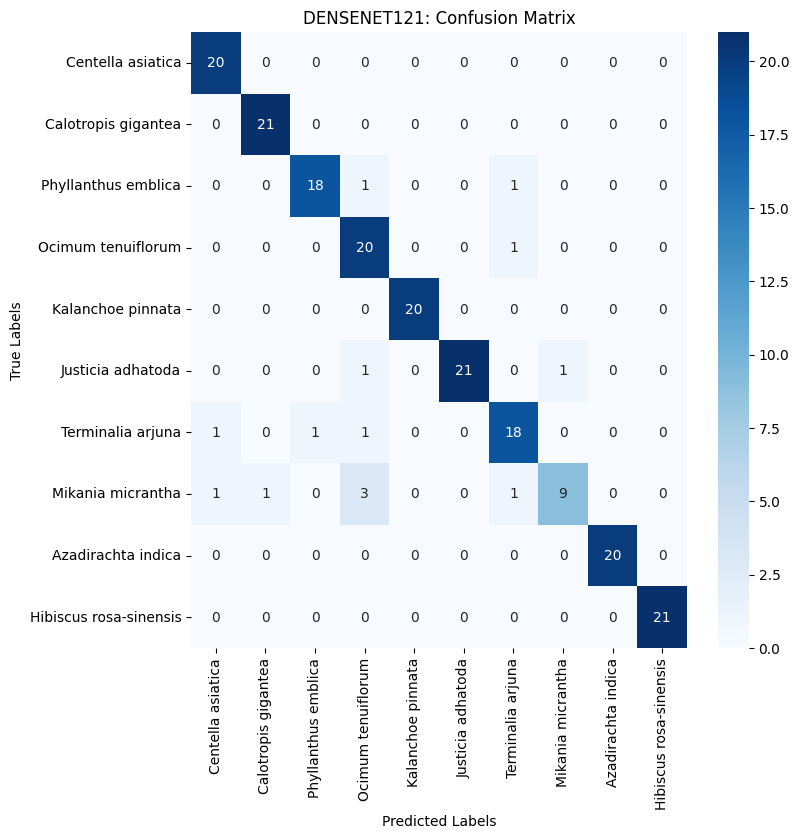

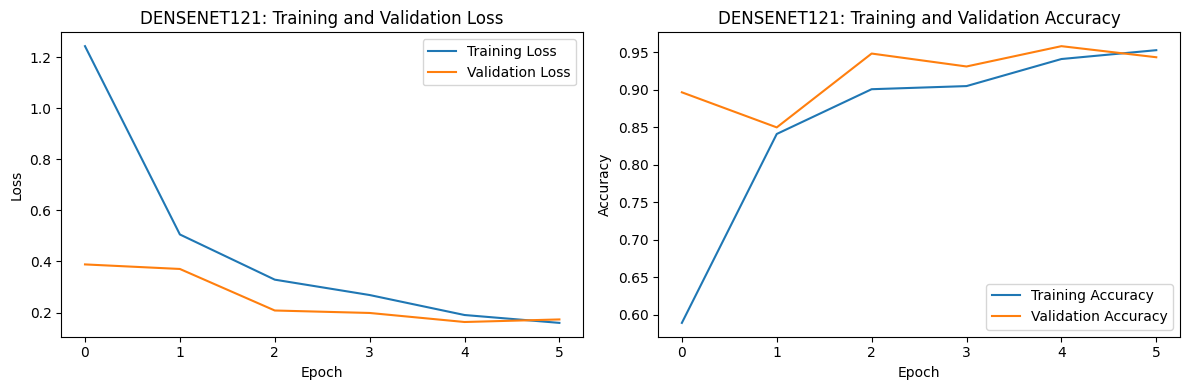

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

class_names =  ['Centella asiatica', 'Calotropis gigantea', 'Phyllanthus emblica', 'Ocimum tenuiflorum', 'Kalanchoe pinnata', 'Justicia adhatoda', 'Terminalia arjuna', 'Mikania micrantha', 'Azadirachta indica', 'Hibiscus rosa-sinensis']
# Test veri seti üzerinde tahminler yapma
predictions = dense_model.predict(dense_test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = dense_test_generator.classes


# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Confusion matrix'in ısı haritasını çizme
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('DENSENET121: Confusion Matrix')
plt.show()

# train loss- accuracy validation loss- aaccuracy
plt.figure(figsize=(12, 4))

# Eğitim ve doğrulama loss
plt.subplot(1, 2, 1)
plt.plot(dense_history.history['loss'], label='Training Loss')
plt.plot(dense_history.history['val_loss'], label='Validation Loss')
plt.title('DENSENET121: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Eğitim ve doğrulama accuracy
plt.subplot(1, 2, 2)
plt.plot(dense_history.history['accuracy'], label='Training Accuracy')
plt.plot(dense_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('DENSENET121: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#### RESULTS accuracy
import pandas as pd


accuracy_data = {
    'Model': ['CNN', 'VGG19', 'DenseNet121'],
    'Test accuracy': [
        cnn.evaluate(test_data)[1],
        vgg19_model.evaluate(vgg_test_generator)[1],
        dense_model.evaluate(dense_test_generator)[1]
    ]
}


accuracy_df = pd.DataFrame(accuracy_data)


print(accuracy_df)



7/7 [==============================] - 14s 2s/step - loss: 0.1611 - accuracy: 0.9307
         Model  Test accuracy
0          CNN       0.762376
1        VGG19       0.767327
2  DenseNet121       0.930693


7/7 [==============================] - 15s 2s/step


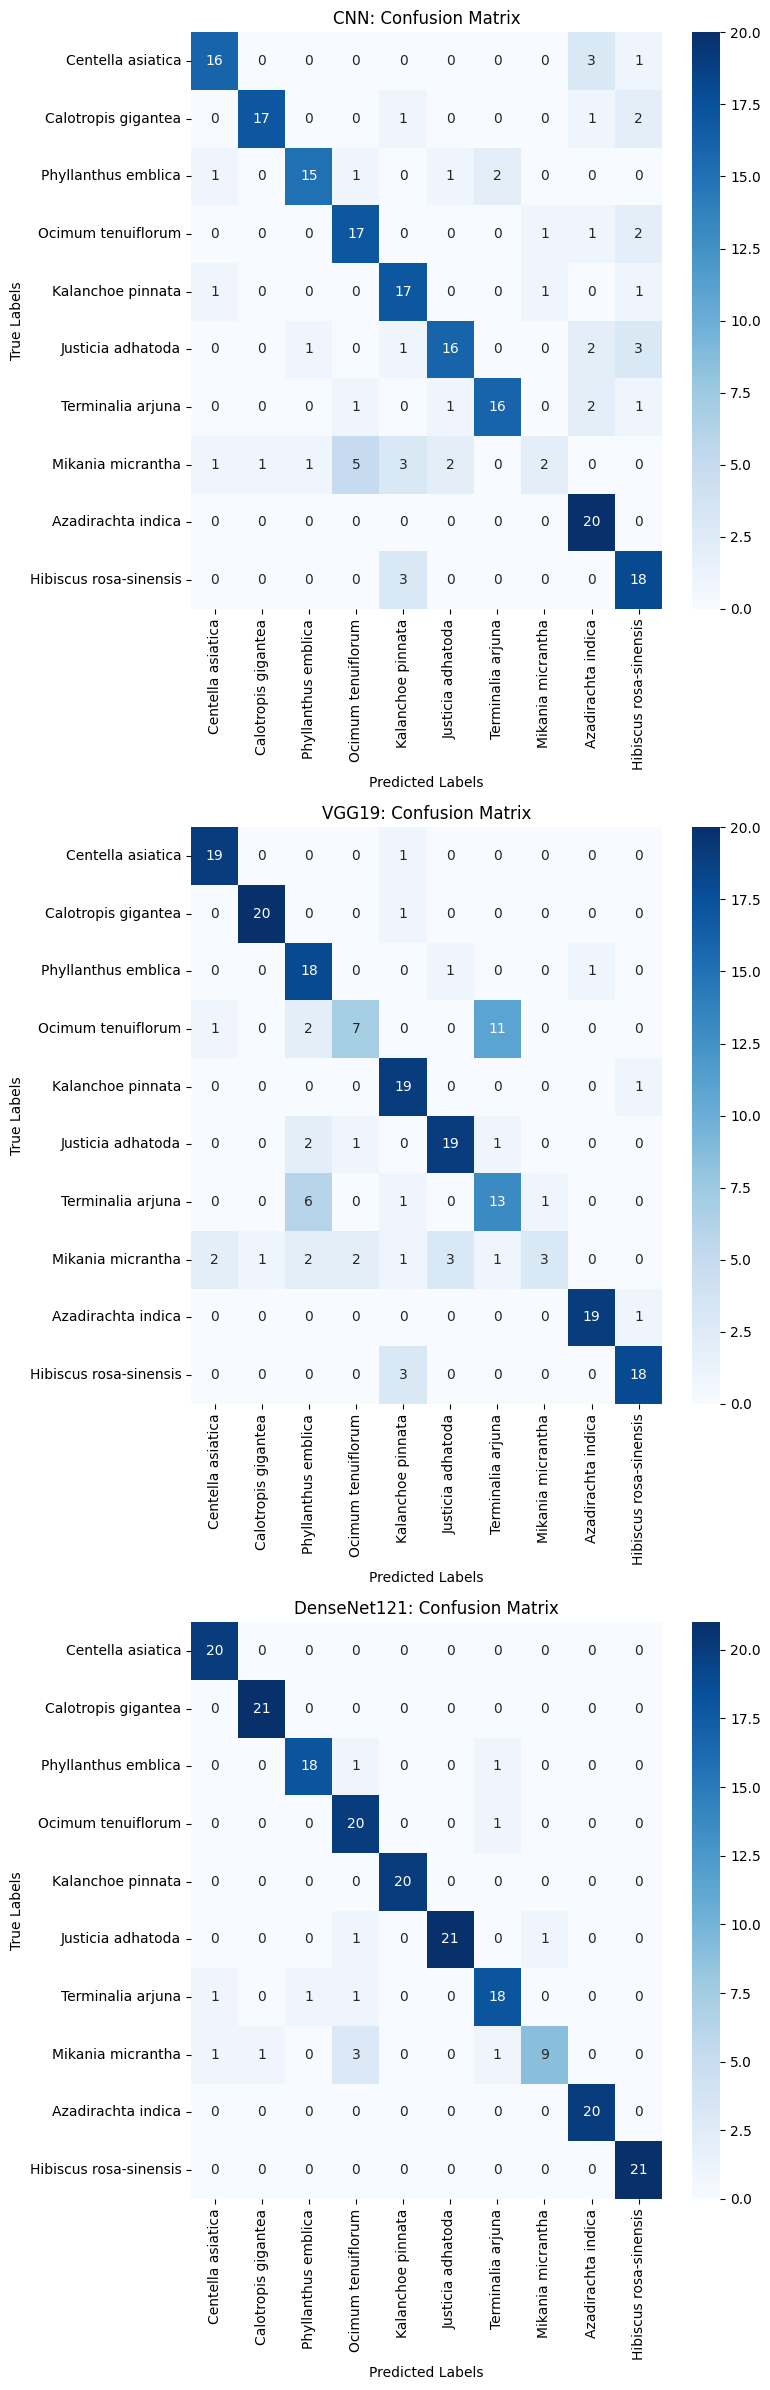

In [ ]:
## RESULTS Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np


class_names =  ['Centella asiatica', 'Calotropis gigantea', 'Phyllanthus emblica', 'Ocimum tenuiflorum', 'Kalanchoe pinnata', 'Justicia adhatoda', 'Terminalia arjuna', 'Mikania micrantha', 'Azadirachta indica', 'Hibiscus rosa-sinensis']

#CNN
cnn_predictions = cnn.predict(test_data)
cnn_predicted_labels = np.argmax(cnn_predictions, axis=1)
cnn_true_labels = test_data.classes
cnn_cm = confusion_matrix(cnn_true_labels, cnn_predicted_labels)

#VGG19
vgg19_predictions = vgg19_model.predict(vgg_test_generator)
vgg19_predicted_labels = np.argmax(vgg19_predictions, axis=1)
vgg19_true_labels = vgg_test_generator.classes
vgg19_cm = confusion_matrix(vgg19_true_labels, vgg19_predicted_labels)

#DenseNet121
dense_predictions = dense_model.predict(dense_test_generator)
dense_predicted_labels = np.argmax(dense_predictions, axis=1)
dense_true_labels = dense_test_generator.classes
dense_cm = confusion_matrix(dense_true_labels, dense_predicted_labels)


plt.figure(figsize=(8, 24))

#CNN
plt.subplot(3, 1, 1)
sns.heatmap(cnn_cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('CNN: Confusion Matrix')

#VGG19
plt.subplot(3, 1, 2)
sns.heatmap(vgg19_cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('VGG19: Confusion Matrix')

#DenseNet121
plt.subplot(3, 1, 3)
sns.heatmap(dense_cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('DenseNet121: Confusion Matrix')


plt.tight_layout()
plt.show()







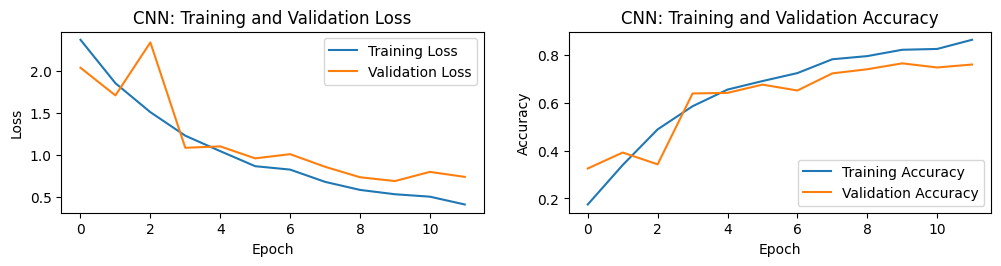

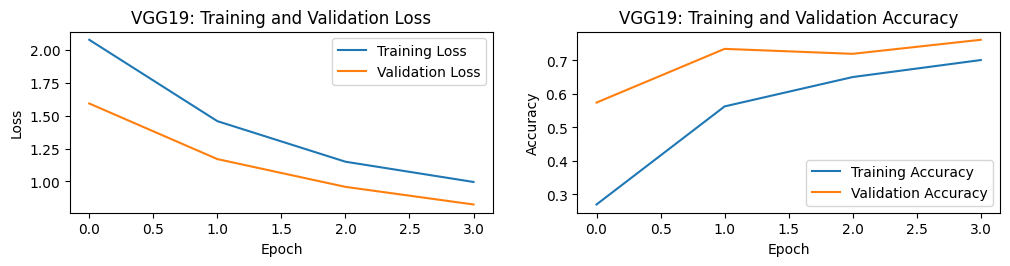

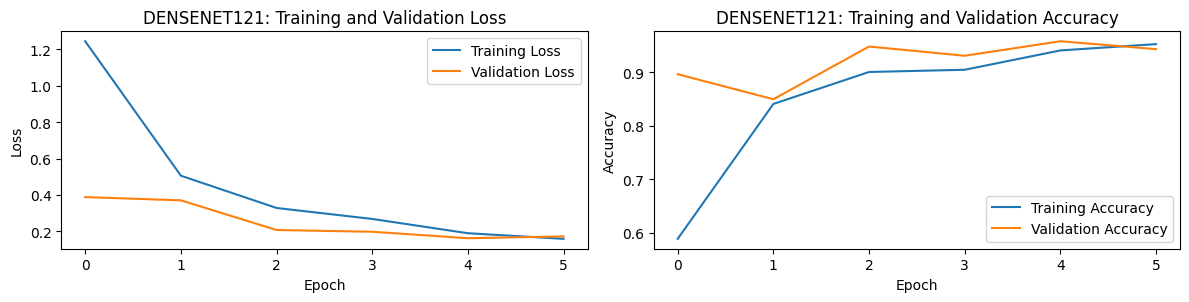

In [ ]:
## RESULT train-validation accuracy-los

# CNN
plt.figure(figsize=(12, 8))

#
plt.subplot(3, 2, 1)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(3, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# VGG19
plt.figure(figsize=(12, 8))


plt.subplot(3, 2, 3)
plt.plot(vgg19_history.history['loss'], label='Training Loss')
plt.plot(vgg19_history.history['val_loss'], label='Validation Loss')
plt.title('VGG19: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(3, 2, 4)
plt.plot(vgg19_history.history['accuracy'], label='Training Accuracy')
plt.plot(vgg19_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG19: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# DenseNet121
plt.figure(figsize=(12, 8))


plt.subplot(3, 2, 5)
plt.plot(dense_history.history['loss'], label='Training Loss')
plt.plot(dense_history.history['val_loss'], label='Validation Loss')
plt.title('DENSENET121: Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(3, 2, 6)
plt.plot(dense_history.history['accuracy'], label='Training Accuracy')
plt.plot(dense_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('DENSENET121: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#
# CNN'de 10 epoch boyunca validation loss , training loss'dan çoğunlukla büyük fakat aralarında çok fark yok. train ve validation loss 10 epoch  boyunca genellikle azalmış.
# CNN'de 10 epoch boyunca training accuracy , validation accuracy'den çoğunlukla daha yüksek çıkmış fakat birbirine çok uzak değiller, train ve validation accuracy 10 epoch boyunca genellikle artış göstermiş.
# CNN'de 10. epoch'da train accuracy: 0.818 , validation accuracy:0.7586 aralarındaki fark biraz fazla, test accuracy:0.76 ile validation accuracy'den fazla çıkmış.


#
# VGG19'da 4 epoch boyunca validation loss , training loss'dan büyük. train ve validation loss epochlar boyunca genellikle azalmış.
# VGG19'da 4 epoch boyunca training accuracy , validation accuracy'den  düşük çıkmış bu  validation setinde train setindekinden daha yüksek doğrulukla tahminler yaptığımız anlamına geliyor.
# VGG19'da 4. epoch'da train accuracy: 0.7007 , validation accuracy:0.7611 aralarındaki fark biraz fazla ama validation accuracy trainden daha yüksek bu iyi, test accuracy:0.7673 ile validation accuracy'den biraz da olsa fazla çıkmış.


#
# DenseNet121'de  6 epoch boyunca validation loss , training loss'dan küçük. train ve validation loss epochlar boyunca genellikle azalmış.
# DenseNet121'de  6 epoch boyunca training accuracy , validation accuracy'den  düşük çıkmış bu  validation setinde train setindekinden daha yüksek doğrulukla tahminler yaptığımız anlamına geliyor.
# DenseNet121'de  6. epoch'da train accuracy: 0.9528 , validation accuracy:0.9433 aralarındaki fark az ama validation accuracy daha küçük çıkmış ,validation accuracy: 0.9307  trainden ve validationdan daha küçük çıkmış overfitting.